In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import astropy.units as u
import astropy.constants as c

In [3]:
from interferometers import *
from sources import *

In [4]:
%matplotlib inline

In [5]:
class IPTA(TimingArray):
    name = "International Pulsar Timing Array"

In [6]:
ipta = IPTA()

In [7]:
frequencies = np.linspace(0, 1e5, 1000) * u.hertz
geo = GEO()
iligo = InitialLIGO()
tama = TAMA()
virgo = VIRGO()
aligo = AdvancedLIGO()
elisa = EvolvedLISA()

In [8]:
cbc = CBC(frequencies= np.logspace(-4, 5, 1000) * u.hertz, m1=32*u.solMass, m2=30*u.solMass, r=0.7*1e9*u.parsec)

(1e-05, 3000.0)

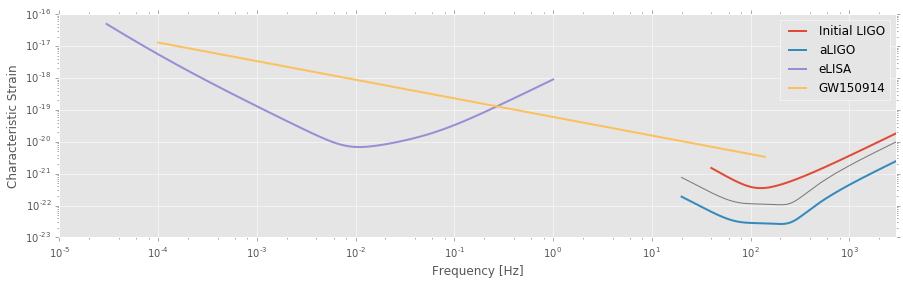

In [36]:
plt.style.use('ggplot')
f, ax = plt.subplots(1, figsize=(15, 4))
#geo.plot(axis = ax)
iligo.plot(ax)
#tama.plot(ax)
#virgo.plot(ax)
aligo.plot(ax)
elisa.plot(ax)
#ipta.plot(ax)
#ax.loglog(np.linspace(1e-4, 1e5, 1000) * u.hertz, np.sqrt((np.linspace(1e-4, 1e5, 1000) * u.hertz)**2 * cbc.raw_strain(np.linspace(1e-4, 1e5, 1000) * u.hertz)**2))
plt.loglog(aligo.frequencies, 4*aligo.noise_amplitude())
cbc.name="GW150914"
cbc.plot(ax)
ax.set_xlim([1e-5,3e3]);
#ax.set_ylim([1e-23,1e-17]);

In [10]:
aligo_freq = np.genfromtxt('data/aligo_freqVector.txt')
aligo_sen_o1 = np.genfromtxt('data/o1_data50Mpc_step1.txt')

In [30]:
cbc.snr(elisa)

<Quantity 124.71393035453741>

In [37]:
cbc.snr(aligo)/4

<Quantity 32.103835335097045>

In [35]:
cbc.snr(virgo)

<Quantity 8.982861489613411>

In [11]:
frequencies= np.logspace(-4, 0, 1000)

In [ ]:
def elisa_s(frequencies, L):
    #residual acceleration noise
    sacc = 9e-28 * (1*u.hertz)**4 * (2*np.pi*frequencies)**-4 * (1+(1e-4*u.hertz)/frequencies) * u.meter**2 * u.hertz**-1 # * u.second**-4 
    # shot noise
    ssn = 5.25e-23 * u.meter**2 / u.hertz
    # other measurement noise
    son = 6.28e-23 * u.meter**2 / u.hertz
    #
    s  =(20./3) * (4*(sacc + ssn + son) / L**2) * ( 1+ (frequencies/(0.41 * (c.c/(2*L))))**2)
    return s

In [ ]:
frequencies= np.logspace(-4, 0, 1000) * u.hertz
np.sqrt(elisa_s(frequencies, 1e09*u.meter)*frequencies)

In [38]:
def f_plus(theta, phi, psi):
    if isinstance(psi, list):
        psi1 = integrate.quad(lambda psi: np.cos(2*psi), psi[0], psi[1])[0]
        psi2 = integrate.quad(lambda psi: np.sin(2*psi), psi[0], psi[1])[0]
    else:
        psi1 = np.cos(2*psi)
        psi2 = np.sin(2*psi)
    return 0.5 * (1+np.cos(theta)**2) * psi1 * np.cos(2*phi) - np.cos(theta) * np.sin(2*phi) * psi2

def f_cross(theta, phi, psi):
    if isinstance(psi, list):
        psi1 = integrate.quad(lambda psi: np.cos(2*psi), psi[0], psi[1])[0]
        psi2 = integrate.quad(lambda psi: np.sin(2*psi), psi[0], psi[1])[0]
    else:
        psi1 = np.cos(2*psi)
        psi2 = np.sin(2*psi)
    return 0.5 * (1+np.cos(theta)**2) * np.cos(2*phi) * psi2 + np.cos(theta) * np.sin(2*phi) * psi1

In [39]:
def f_joint(theta, phi):
    return 0.25 * (1 + np.cos(theta)**2)**2 * np.cos(2*phi)**2 + np.cos(theta)**2 * np.sin(2*phi)**2

In [42]:
x = np.linspace(0, np.pi, 100)
y = np.linspace(0, 2*np.pi, 200)
xv, yv = np.meshgrid(x,y)

psi = [0, np.pi] #np.pi/2

antennap = f_plus(xv, yv, psi)
antennax = f_cross(xv, yv, psi)
antennac = f_joint(xv, yv)

In [41]:
import scipy.integrate as integrate

In [ ]:
plt.style.use('ggplot')
ax = plt.subplot(111, projection="hammer")
plt.pcolormesh(y-np.pi,x-np.pi/2., np.sqrt(antennap**2 + antennax**2).T, cmap='viridis')

In [ ]:
import numpy.linalg as la

In [ ]:
xhat = np.array([1,0,0])
yhat = np.array([0,1,0])
zhat = np.array([0,0,1])
L = 4 * u.kilometer

In [ ]:
d = L * (np.outer(xhat, xhat) - np.outer(yhat, yhat))
dhat = (np.outer(xhat, xhat) - np.outer(yhat, yhat))

In [ ]:
e = np.array([
        [1,0],
        [0,1]
    ])

In [ ]:
np.dot(e,rot_polar(4))

In [ ]:
def rot_polar(psi):
    return np.array([[np.cos(psi), np.sin(psi)],
                     [-np.sin(psi), np.cos(psi)]])

def rot_phi(phi):
    return np.array([
            [np.cos(phi), -np.sin(phi), 0],
            [np.sin(phi), np.cos(phi), 0],
            [0,0,1]
        ])

def rot_theta(theta):
    return np.array([
            [1,0,0],
            [0, np.cos(theta), -np.sin(theta)],
            [0, np.sin(theta), np.cos(theta)]
        ])

In [ ]:
np.dot(np.dot(np.dot(dhat,rot_theta(0.5)), rot_phi(1.0)), e)

In [ ]:
cbc.raw_strain()

In [ ]:
M = 30*u.solMass
cbc.fdot().to(u.hertz**2)